## Mass of the Einstein Desert

$9\,\rm{\mu as}<\theta_E<25\,\rm{\mu as}$

[9.98750000e-02 4.98750000e-02 3.32083333e-02 2.48750000e-02
 1.98750000e-02 1.65416667e-02 1.41607143e-02 1.23750000e-02
 1.09861111e-02 9.87500000e-03 8.96590909e-03 8.20833333e-03
 7.56730769e-03 7.01785714e-03 6.54166667e-03 6.12500000e-03
 5.75735294e-03 5.43055556e-03 5.13815789e-03 4.87500000e-03
 4.63690476e-03 4.42045455e-03 4.22282609e-03 4.04166667e-03
 3.87500000e-03 3.72115385e-03 3.57870370e-03 3.44642857e-03
 3.32327586e-03 3.20833333e-03 3.10080645e-03 3.00000000e-03
 2.90530303e-03 2.81617647e-03 2.73214286e-03 2.65277778e-03
 2.57770270e-03 2.50657895e-03 2.43910256e-03 2.37500000e-03
 2.31402439e-03 2.25595238e-03 2.20058140e-03 2.14772727e-03
 2.09722222e-03 2.04891304e-03 2.00265957e-03 1.95833333e-03
 1.91581633e-03 1.87500000e-03 1.83578431e-03 1.79807692e-03
 1.76179245e-03 1.72685185e-03 1.69318182e-03 1.66071429e-03
 1.62938596e-03 1.59913793e-03 1.56991525e-03 1.54166667e-03
 1.51434426e-03 1.48790323e-03 1.46230159e-03 1.43750000e-03
 1.41346154e-03 1.390151

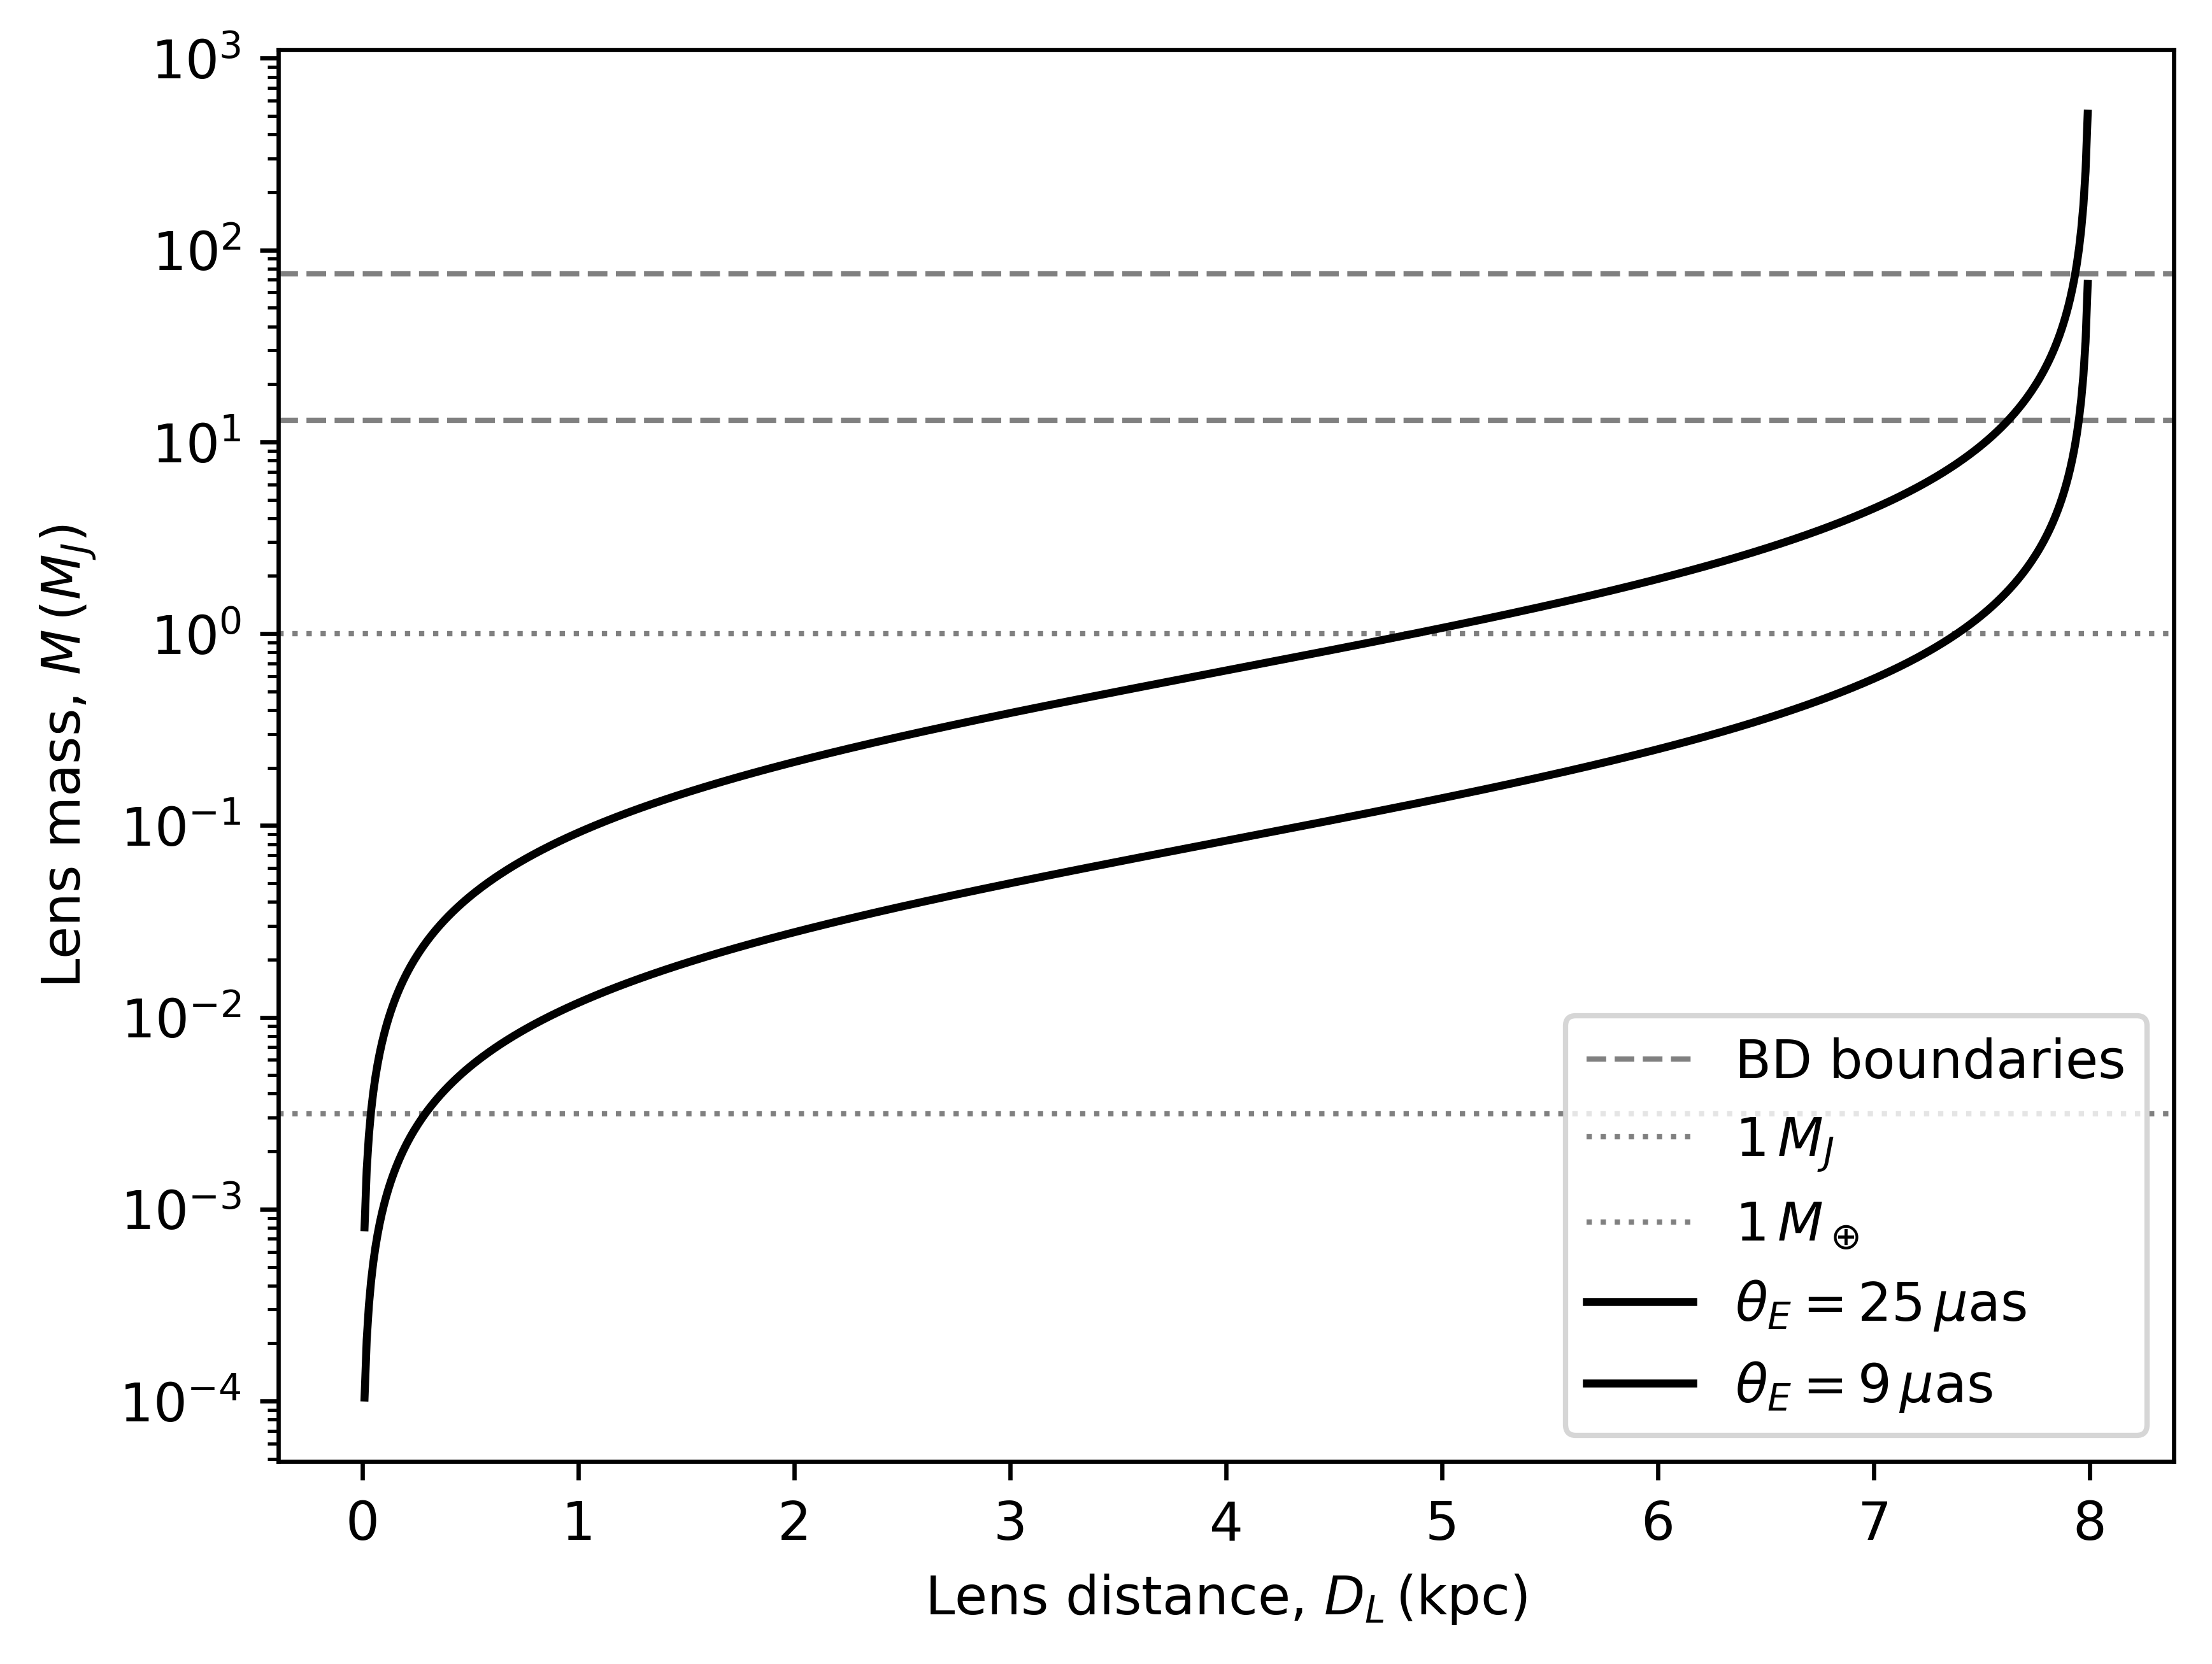

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def MfromthetaE(theta_E,DL,DS=8):
    ''' find M
    
    Inputs:
    --------
    theta_E:            arr or flaot
                        micro arc seconds
    DL:                 arr or float
                        kpc
    DS (optional):      arr or float
                        default is 8 - galactic center
                        kpc    

    Output:
    --------
    M:          arr of float (like theta_E)
                in Jupiter masses
                
    Notes:
    -------
    $M = \frac{\theta_E^2}{\kappa\pi_{rel}}$,
    where
    $\kappa=8.144\,\rm{mas}/M_\odot$.
    
    $M_\odot = 1047.57 M_J$  - according to Google
    
    $\pi_{rel} = \rm{au}(\frac{1}{D_L}-\frac{1}{D_S})$,
    the au just means we are working in parsecs distances and as for our angles because, be definition,
    1 parsec is the disance to something with a parallax angle of 1 as. 

    $d = \frac{1}{p}$, 
    where $d$ is the distance to the star in parsecs (1 pc = 3.26 light-years) 
    and $p$ is the parallax angle in arc seconds.
    '''

    # Constants
    kappa = 8.144  # mas/MS
    MS_MJ = 1047.57 # mass of the sun in jupiter masses (MJ)
    kappa_muMJ = kappa*1000/MS_MJ  # muas/MJ
    #au = 0.000484814  #kpc
    #rad_deg = 1.0*180.0/np.pi  # 1 radian in degrees
    #deg_as = 1.0*60.0*60.0  # 1 deg in mas
    as_muas = 1.0*1000000.0  # 1 as in muas
    #rad_muas = rad_deg*deg_as*as_muas  # 1 rad in muas

    #pirel_rad = au*(1.0/DL-1.0/DS)  # DL, DS and au are all in kpc. pi is in rad (small angle appeoximation)
    #pirel_muas = pirel_rad*rad_muas  # converting units to muas
    pirel_as = (1./(DL*1000)-1.0/(DS*1000))
    pirel_muas = pirel_as*as_muas
    print(pirel_as, pirel_muas)
    M = theta_E**2/(kappa_muMJ*pirel_muas)  # M in Jupiter masses
    return M

D_L = np.linspace(0.01,7.99,799)
M_9 = MfromthetaE(9.,D_L,DS=8)
M_25 = MfromthetaE(25.,D_L,DS=8)

plt.figure(dpi=600)

# Annotations
plt.axhline(13., color='grey', linestyle='dashed', linewidth=1, label=r'BD boundaries')
plt.axhline(75, color='grey', linestyle='dashed', linewidth=1)
plt.axhline(1, color='grey', linestyle='dotted', linewidth=1, label=r'$1\,M_J$')
plt.axhline(0.00314558, color='grey', linestyle='dotted', linewidth=1, label=r'$1\,M_\oplus$')

# Mass functions
plt.plot(D_L, M_25, 'k-', label=r'$\theta_E=25\,\mu\rm{as}$')
plt.plot(D_L, M_9, 'k-', label=r'$\theta_E=9\,\mu\rm{as}$')

# plot stuff
plt.xlabel(r'Lens distance, $D_L\, (\rm kpc)$')
plt.ylabel(r'Lens mass, $M\, (M_J$)')
plt.yscale('log')
#plt.xlim((0,8))
plt.legend()
plt.savefig('Einstein_desert_masses.png')
plt.show()

[9.97777778e-02 4.97777778e-02 3.31111111e-02 2.47777778e-02
 1.97777778e-02 1.64444444e-02 1.40634921e-02 1.22777778e-02
 1.08888889e-02 9.77777778e-03 8.86868687e-03 8.11111111e-03
 7.47008547e-03 6.92063492e-03 6.44444444e-03 6.02777778e-03
 5.66013072e-03 5.33333333e-03 5.04093567e-03 4.77777778e-03
 4.53968254e-03 4.32323232e-03 4.12560386e-03 3.94444444e-03
 3.77777778e-03 3.62393162e-03 3.48148148e-03 3.34920635e-03
 3.22605364e-03 3.11111111e-03 3.00358423e-03 2.90277778e-03
 2.80808081e-03 2.71895425e-03 2.63492063e-03 2.55555556e-03
 2.48048048e-03 2.40935673e-03 2.34188034e-03 2.27777778e-03
 2.21680217e-03 2.15873016e-03 2.10335917e-03 2.05050505e-03
 2.00000000e-03 1.95169082e-03 1.90543735e-03 1.86111111e-03
 1.81859410e-03 1.77777778e-03 1.73856209e-03 1.70085470e-03
 1.66457023e-03 1.62962963e-03 1.59595960e-03 1.56349206e-03
 1.53216374e-03 1.50191571e-03 1.47269303e-03 1.44444444e-03
 1.41712204e-03 1.39068100e-03 1.36507937e-03 1.34027778e-03
 1.31623932e-03 1.292929

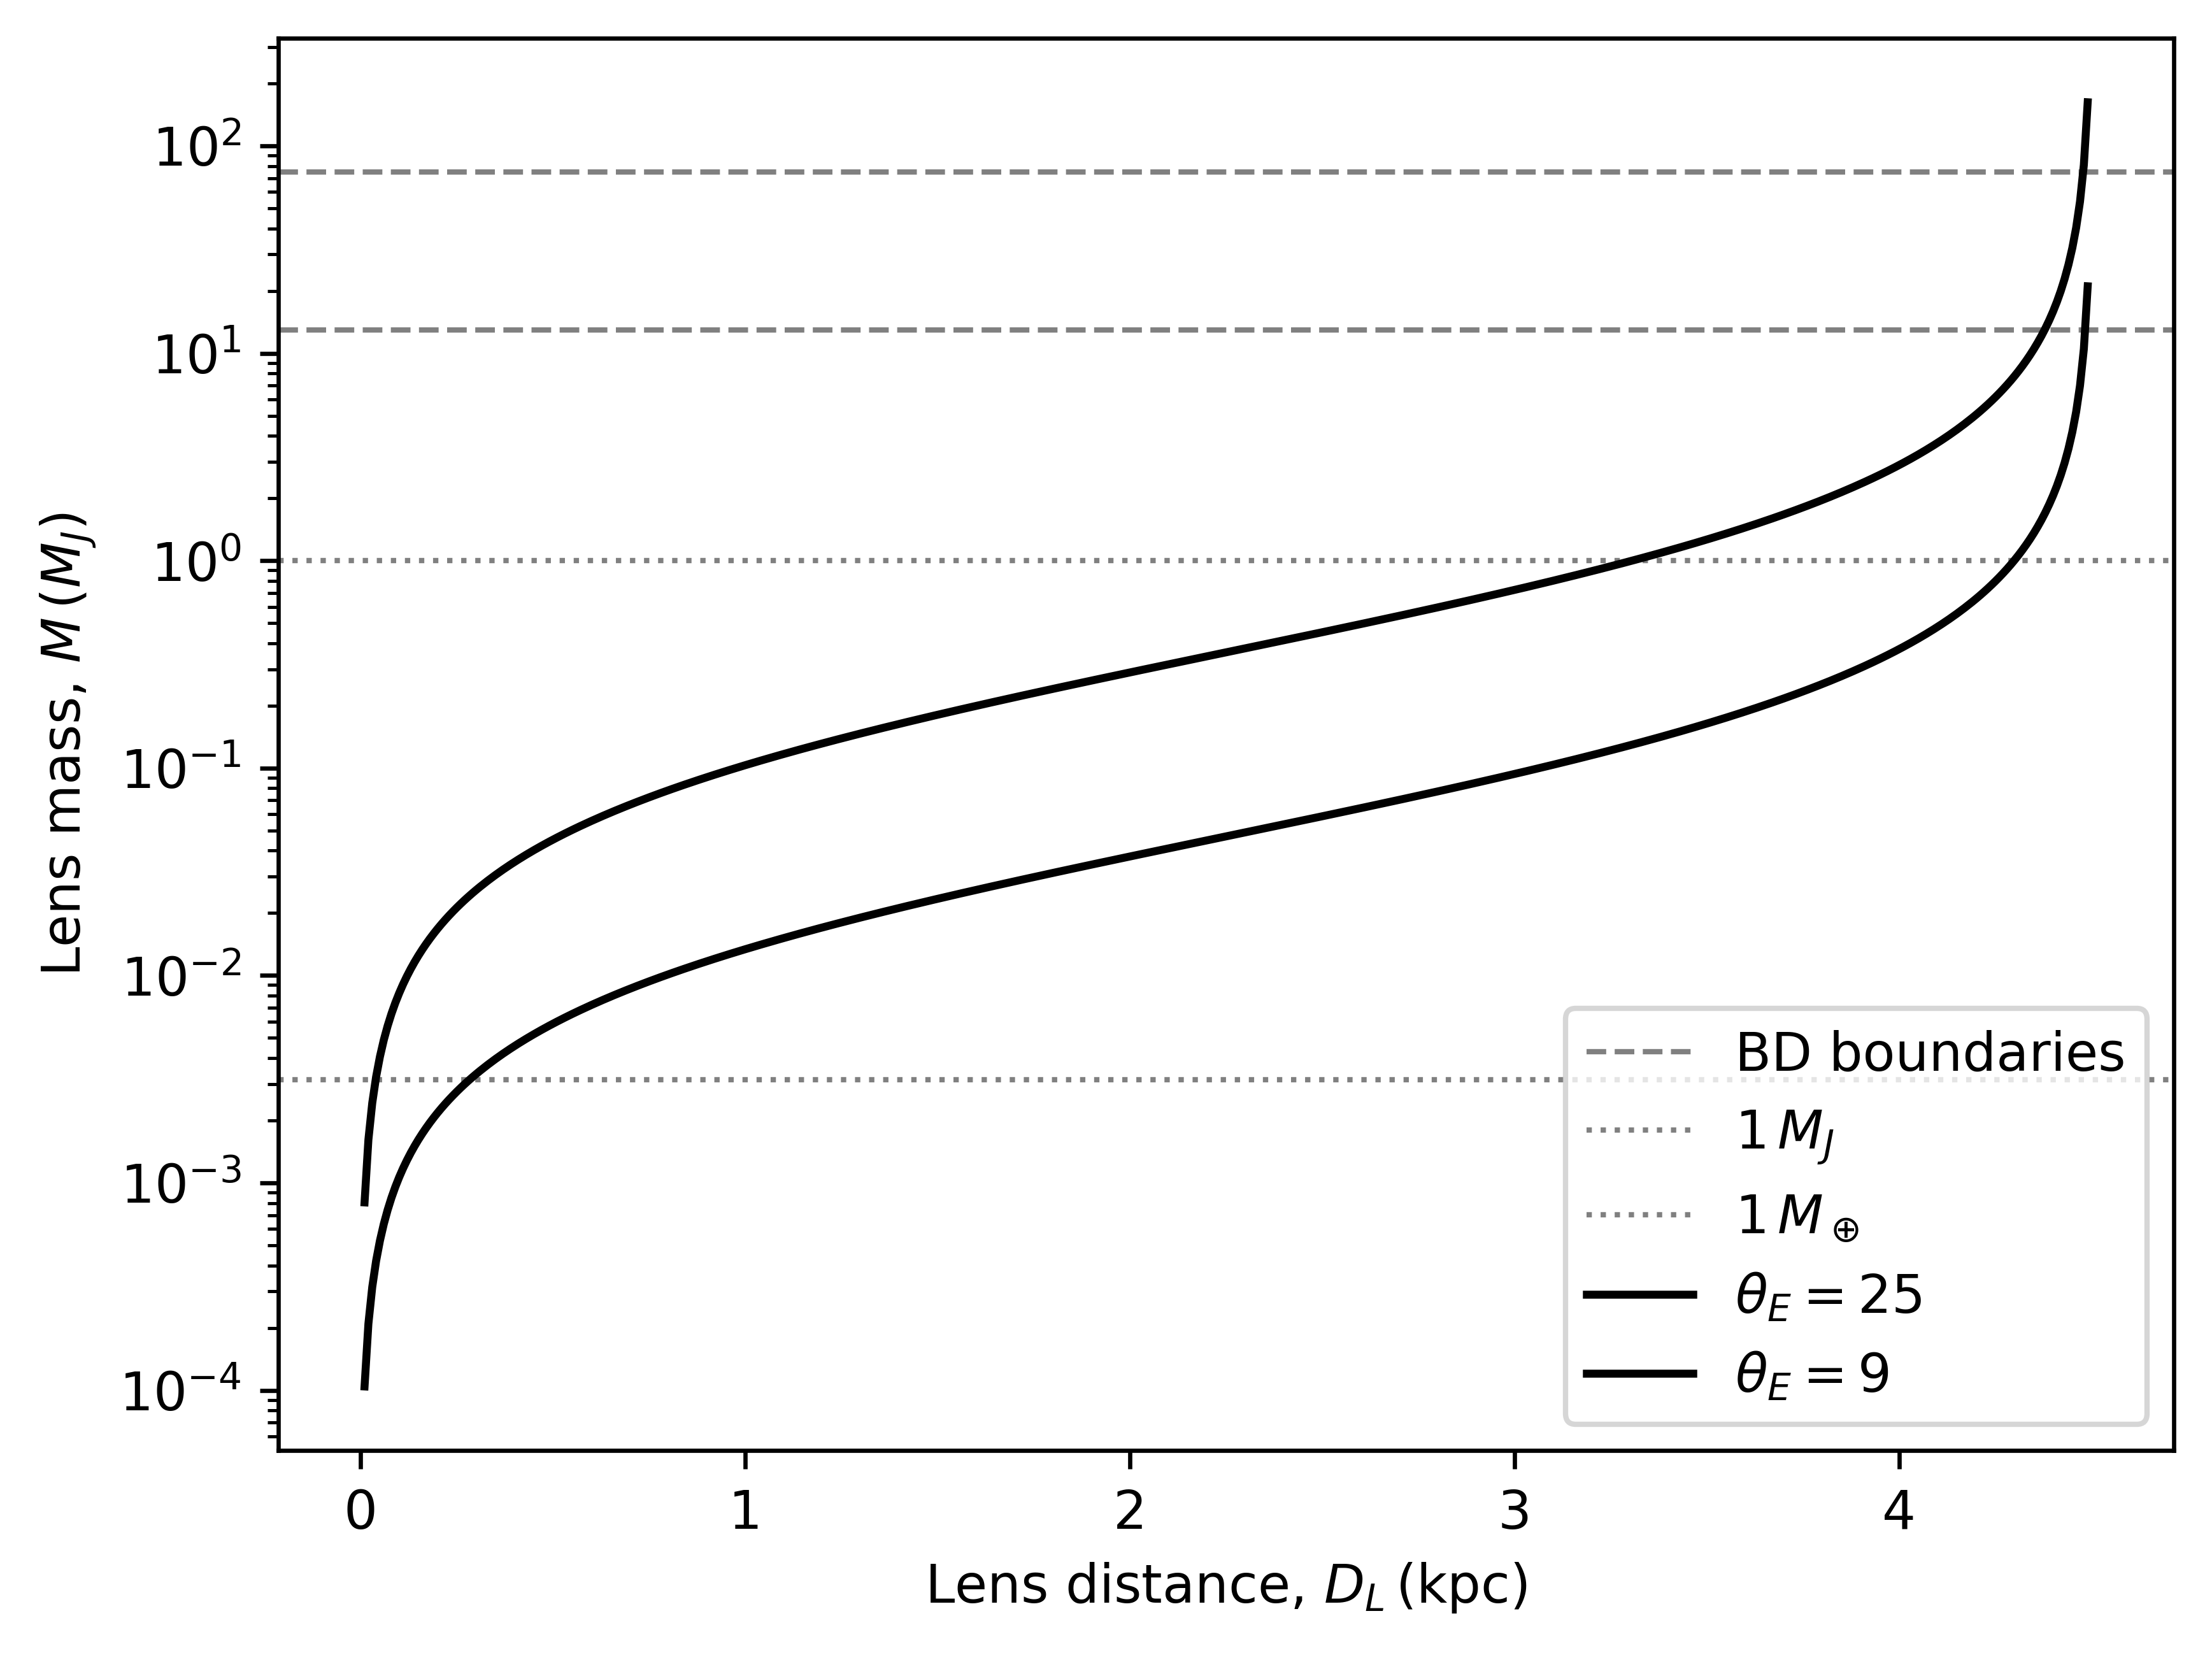

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def MfromthetaE(theta_E,DL,DS=8):
    ''' find M
    
    Inputs:
    --------
    theta_E:            arr or flaot
                        micro arc seconds
    DL:                 arr or float
                        kpc
    DS (optional):      arr or float
                        default is 8 - galactic center
                        kpc    

    Output:
    --------
    M:          arr of float (like theta_E)
                in Jupiter masses
                
    Notes:
    -------
    $M = \frac{\theta_E^2}{\kappa\pi_{rel}}$,
    where
    $\kappa=8.144\,\rm{mas}/M_\odot$.
    
    $M_\odot = 1047.57 M_J$  - according to Google
    
    $\pi_{rel} = \rm{au}(\frac{1}{D_L}-\frac{1}{D_S})$,
    the au just means we are working in parsecs distances and as for our angles because, be definition,
    1 parsec is the disance to something with a parallax angle of 1 as. 

    $d = \frac{1}{p}$, 
    where $d$ is the distance to the star in parsecs (1 pc = 3.26 light-years) 
    and $p$ is the parallax angle in arc seconds.
    '''

    # Constants
    kappa = 8.144  # mas/MS
    MS_MJ = 1047.57 # mass of the sun in jupiter masses (MJ)
    kappa_muMJ = kappa*1000/MS_MJ  # muas/MJ
    #au = 0.000484814  #kpc
    #rad_deg = 1.0*180.0/np.pi  # 1 radian in degrees
    #deg_as = 1.0*60.0*60.0  # 1 deg in mas
    as_muas = 1.0*1000000.0  # 1 as in muas
    #rad_muas = rad_deg*deg_as*as_muas  # 1 rad in muas

    #pirel_rad = au*(1.0/DL-1.0/DS)  # DL, DS and au are all in kpc. pi is in rad (small angle appeoximation)
    #pirel_muas = pirel_rad*rad_muas  # converting units to muas
    pirel_as = (1./(DL*1000)-1.0/(DS*1000))
    pirel_muas = pirel_as*as_muas
    print(pirel_as, pirel_muas)
    M = theta_E**2/(kappa_muMJ*pirel_muas)  # M in Jupiter masses
    return M

D_L = np.linspace(0.01,4.49,449)
M_9 = MfromthetaE(9.,D_L,DS=4.5)
M_25 = MfromthetaE(25.,D_L,DS=4.5)

plt.figure(dpi=600)

# Annotations
plt.axhline(13., color='grey', linestyle='dashed', linewidth=1, label=r'BD boundaries')
plt.axhline(75, color='grey', linestyle='dashed', linewidth=1)
plt.axhline(1, color='grey', linestyle='dotted', linewidth=1, label=r'$1\,M_J$')
plt.axhline(0.00314558, color='grey', linestyle='dotted', linewidth=1, label=r'$1\,M_\oplus$')

# Mass functions
plt.plot(D_L, M_25, 'k-', label=r'$\theta_E=25$')
plt.plot(D_L, M_9, 'k-', label=r'$\theta_E=9$')

# plot stuff
plt.xlabel(r'Lens distance, $D_L\, (\rm kpc)$')
plt.ylabel(r'Lens mass, $M\, (M_J$)')
plt.yscale('log')
#plt.xlim((0,8))
plt.legend()
plt.show()
